In [5]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [6]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

business_id                                name  \
0           10                    Tiramisu Kitchen   
1           19               Nrgize Lifestyle Cafe   
2           24  OMNI S.F. Hotel - 2nd Floor Pantry   
3           31      Norman's Ice Cream and Freezes   
4           45                 CHARLIE'S DELI CAFE   

                         address           city postal_code   latitude  \
0                  033 Belden Pl  San Francisco       94104  37.791116   
1   1200 Van Ness Ave, 3rd Floor  San Francisco       94109  37.786848   
2  500 California St, 2nd  Floor  San Francisco       94104  37.792888   
3           2801 Leavenworth St   San Francisco       94133  37.807155   
4                3202 FOLSOM St            S.F.       94110  37.747114   

    longitude phone_number TaxCode  business_certificate application_date  \
0 -122.403816          NaN     H24              779059.0              NaN   
1 -122.421547          NaN     H24                   NaN              NaN   
2 -122.403135          NaN     H24              352312.0              NaN   
3 -122.419004          NaN     H24              346882.0              NaN   
4 -122.413641          NaN     H24              340024.0       10/10/2001   

                      owner_name                 owner_address     owner_city  \
0                   Tiramisu LLC                  33 Belden St  San Francisco   
1            24 Hour Fitness Inc  1200 Van Ness Ave, 3rd Floor  San Francisco   
2  OMNI San Francisco Hotel Corp  500 California St, 2nd Floor  San Francisco   
3               Norman Antiforda           2801 Leavenworth St  San Francisco   
4      HARB, CHARLES AND KRISTIN                  1150 SANCHEZ           S.F.   

  owner_state owner_zip  
0          CA     94104  
1          CA     94109  
2          CA     94104  
3          CA     94133  
4          CA     94114

In [7]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

business_id  Score      date                   type
0           10    NaN  20140807  Reinspection/Followup
1           10   94.0  20140729  Routine - Unscheduled
2           10    NaN  20140124  Reinspection/Followup
3           10   92.0  20140114  Routine - Unscheduled
4           19   94.0  20141110  Routine - Unscheduled

In [8]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head(10)

business_id      date  ViolationTypeID  risk_category  \
0           10  20140114           103154       Low Risk   
1           10  20140114           103119  Moderate Risk   
2           10  20140114           103145       Low Risk   
3           10  20140729           103129  Moderate Risk   
4           10  20140729           103144       Low Risk   
5           19  20140214           103156       Low Risk   
6           19  20140214           103124  Moderate Risk   
7           19  20141110           103145       Low Risk   
8           19  20141110           103116  Moderate Risk   
9           19  20130904           103133  Moderate Risk   

                                         description  
0       Unclean or degraded floors walls or ceilings  
1  Inadequate and inaccessible handwashing facili...  
2   Improper storage of equipment utensils or linens  
3            Insufficient hot water or running water  
4   Unapproved or unmaintained equipment or utensils  
5     Permit license or inspection report not posted  
6  Inadequately cleaned or sanitized food contact...  
7   Improper storage of equipment utensils or linens  
8  Inadequate food safety knowledge or lack of ce...  
9             Foods not protected from contamination

In [9]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
scores = pd.merge(inspections, violations, how='left', on='business_id')
restaurant_scores = pd.merge(businesses, scores, how='left', on='business_id')
restaurant_scores.rename(columns={'type': 'i_type'},inplace=True)
restaurant_scores.head(20)

business_id              name        address           city postal_code  \
0            10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
1            10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
2            10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
3            10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
4            10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
5            10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
6            10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
7            10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
8            10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
9            10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
10           10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
11           10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
12           10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
13           10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
14           10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
15           10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
16           10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
17           10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
18           10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   
19           10  Tiramisu Kitchen  033 Belden Pl  San Francisco       94104   

     latitude   longitude phone_number TaxCode  business_certificate  \
0   37.791116 -122.403816          NaN     H24              779059.0   
1   37.791116 -122.403816          NaN     H24              779059.0   
2   37.791116 -122.403816          NaN     H24              779059.0   
3   37.791116 -122.403816          NaN     H24              779059.0   
4   37.791116 -122.403816          NaN     H24              779059.0   
5   37.791116 -122.403816          NaN     H24              779059.0   
6   37.791116 -122.403816          NaN     H24              779059.0   
7   37.791116 -122.403816          NaN     H24              779059.0   
8   37.791116 -122.403816          NaN     H24              779059.0   
9   37.791116 -122.403816          NaN     H24              779059.0   
10  37.791116 -122.403816          NaN     H24              779059.0   
11  37.791116 -122.403816          NaN     H24              779059.0   
12  37.791116 -122.403816          NaN     H24              779059.0   
13  37.791116 -122.403816          NaN     H24              779059.0   
14  37.791116 -122.403816          NaN     H24              779059.0   
15  37.791116 -122.403816          NaN     H24              779059.0   
16  37.791116 -122.403816          NaN     H24              779059.0   
17  37.791116 -122.403816          NaN     H24              779059.0   
18  37.791116 -122.403816          NaN     H24              779059.0   
19  37.791116 -122.403816          NaN     H24              779059.0   

                          ...                             owner_city  \
0                         ...                          San Francisco   
1                         ...                          San Francisco   
2                         ...                          San Francisco   
3                         ...                          San Francisco   
4                         ...                          San Francisco   
5                         ...                          San Francisco   
6                         ...                          San Francisco   
7                         ...                          San Francisco   
8                         ...                          San Francisco   
9                         ...                          San Francisco   
10                        ...          

In [94]:
# 2 Which ten business have had the most inspections?
inspections.business_id.value_counts().head(10)
#restaurant_scores.name.value_counts().head(10)

1775     21
74374    20
2505     20
71618    19
74131    19
67154    19
71804    19
489      18
7747     18
65523    17
Name: business_id, dtype: int64

In [11]:
# 3 Group and count the inspections by type
#inspections.groupby('type').count().sort_values('business_id', ascending=False)
inspections.type.value_counts()

Routine - Unscheduled                15481
Reinspection/Followup                 5386
New Ownership                         1877
Complaint                             1634
New Construction                      1613
Non-inspection site visit              840
Complaint Reinspection/Followup        163
Structural Inspection                  120
Foodborne Illness Investigation        100
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

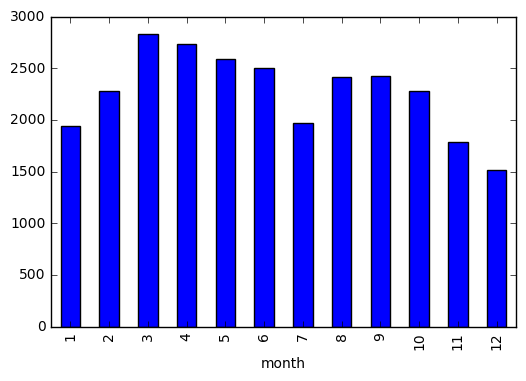

In [12]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap
inspections['month']=inspections['date'].apply(lambda x: int(str(x)[4:][:2]))
inspections.groupby('month').month.count().plot(kind='bar')

In [13]:
# 5 Which zip code contains the most high risk violations?
restaurant_scores.rename(columns={'type': 'i_type'},inplace=True)
restaurant_scores[restaurant_scores.risk_category == "High Risk"].postal_code.value_counts().head(1)

94133    3640
Name: postal_code, dtype: int64

In [14]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower ris
restaurant_scores[restaurant_scores.i_type=='New Ownership'].risk_category.value_counts(normalize=True).head(1)

Low Risk    0.512491
Name: risk_category, dtype: float64

In [15]:
# 7 Examining the descriptions, what is the most common violation?
restaurant_scores.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    20839
Name: description, dtype: int64

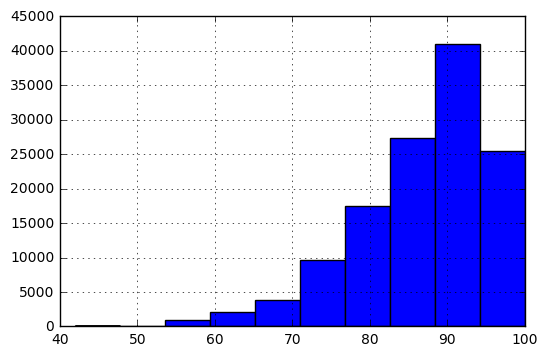

In [16]:
# 8 Create a hist of the scores with 10 bins
restaurant_scores.Score.hist(bins=10)

In [17]:
restaurant_scores_not_null = restaurant_scores.dropna()
restaurant_scores_not_null.shape

(10633, 23)

In [18]:
restaurant_scores_not_null.dtypes

business_id               int64
name                     object
address                  object
city                     object
postal_code              object
latitude                float64
longitude               float64
phone_number             object
TaxCode                  object
business_certificate    float64
application_date         object
owner_name               object
owner_address            object
owner_city               object
owner_state              object
owner_zip                object
Score                   float64
date_x                  float64
i_type                   object
date_y                  float64
ViolationTypeID         float64
risk_category            object
description              object
dtype: object

In [19]:
X = restaurant_scores_not_null[['Score','ViolationTypeID','date_x']]
X.dropna
X.head()

Score  ViolationTypeID      date_x
1791   80.0         103165.0  20150420.0
1792   80.0         103116.0  20150420.0
1793   80.0         103144.0  20150420.0
1794   80.0         103142.0  20150420.0
1795   80.0         103120.0  20150420.0

In [20]:
# 9 Can you predict risk category based on the other features in this dataset?
from sklearn.preprocessing import StandardScaler
s = StandardScaler()


X_scaled = s.fit_transform(X[['Score','ViolationTypeID','date_x']].as_matrix())

from sklearn.neighbors import KNeighborsClassifier
y=restaurant_scores_not_null['risk_category']
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
#list(restaurant_scores.columns.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [21]:
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
np.mean(scores)

0.96181584044223223

In [22]:
k_range = range(1, 30, 2)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=5, scoring='accuracy')))
scores

[0.96661371673886176,
 0.96181584044223223,
 0.95711265755002306,
 0.95372902182410824,
 0.95147320627117016,
 0.94818076962923603,
 0.94535883268294696,
 0.94310177869830913,
 0.94169138560806309,
 0.94037396014800423,
 0.93793026320990358,
 0.93426255076571396,
 0.93294552323479274,
 0.93097046828237651,
 0.92918386947391718]

In [23]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [24]:
############################
### A Little More Morbid ###
############################

In [25]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

Unnamed: 0                name  age gender    raceethnicity     month  day  \
0           0  A'donte Washington   16   Male            Black  February   23   
1           1      Aaron Rutledge   27   Male            White     April    2   
2           2         Aaron Siler   26   Male            White     March   14   
3           3        Aaron Valdez   25   Male  Hispanic/Latino     March   11   
4           4        Adam Jovicic   29   Male            White     March   19   

   year           streetaddress          city state  \
0  2015            Clearview Ln     Millbrook    AL   
1  2015  300 block Iris Park Dr     Pineville    LA   
2  2015    22nd Ave and 56th St       Kenosha    WI   
3  2015       3000 Seminole Ave    South Gate    CA   
4  2015          364 Hiwood Ave  Munroe Falls    OH   

              lawenforcementagency    cause    armed  county_income  
0      Millbrook Police Department  Gunshot       No          54766  
1  Rapides Parish Sheriff's Office  Gunshot       No          40930  
2        Kenosha Police Department  Gunshot       No          54930  
3     South Gate Police Department  Gunshot  Firearm          55909  
4           Kent Police Department  Gunshot       No          49669

In [27]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns={'lawenforcementagency': 'agency','raceethnicity':'race' },inplace=True)
killings.head()

Unnamed: 0                name  age gender             race     month  day  \
0           0  A'donte Washington   16   Male            Black  February   23   
1           1      Aaron Rutledge   27   Male            White     April    2   
2           2         Aaron Siler   26   Male            White     March   14   
3           3        Aaron Valdez   25   Male  Hispanic/Latino     March   11   
4           4        Adam Jovicic   29   Male            White     March   19   

   year           streetaddress          city state  \
0  2015            Clearview Ln     Millbrook    AL   
1  2015  300 block Iris Park Dr     Pineville    LA   
2  2015    22nd Ave and 56th St       Kenosha    WI   
3  2015       3000 Seminole Ave    South Gate    CA   
4  2015          364 Hiwood Ave  Munroe Falls    OH   

                            agency    cause    armed  county_income  
0      Millbrook Police Department  Gunshot       No          54766  
1  Rapides Parish Sheriff's Office  Gunshot       No          40930  
2        Kenosha Police Department  Gunshot       No          54930  
3     South Gate Police Department  Gunshot  Firearm          55909  
4           Kent Police Department  Gunshot       No          49669

In [28]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [29]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings.fillna(value='Unknown')

Unnamed: 0                     name  age  gender             race  \
0             0       A'donte Washington   16    Male            Black   
1             1           Aaron Rutledge   27    Male            White   
2             2              Aaron Siler   26    Male            White   
3             3             Aaron Valdez   25    Male  Hispanic/Latino   
4             4             Adam Jovicic   29    Male            White   
5             5            Adam Reinhart   29    Male            White   
6             6         Adrian Hernandez   22    Male  Hispanic/Latino   
7             7             Adrian Solis   35    Male  Hispanic/Latino   
8             8            Alan Alverson   44    Male            White   
9             9               Alan James   31    Male            White   
10           10         Albert Hanson Jr   76    Male            White   
11           11           Alec Ouzounian   40    Male            White   
12           12        Alejandro Salazar   40    Male  Hispanic/Latino   
13           13           Alexander Long   31    Male            White   
14           14          Alexander Myers   23    Male            White   
15           15         Alexander Rivera   39    Male  Hispanic/Latino   
16           16         Alexia Christian   25  Female            Black   
17           17     Alfredo Rials-Torres   54    Male  Hispanic/Latino   
18           18              Alice Brown   24  Female            White   
19           19             Alvin Haynes   57    Male            Black   
20           20      Amilcar Perez-Lopez   21    Male  Hispanic/Latino   
21           21          Andre Murphy Sr   42    Male            Black   
22           22    Andres Lara-Rodriguez   21    Male  Hispanic/Latino   
23           23            Andrew Driver   36    Male            White   
24           24           Andrew Jackson   26    Male            White   
25           25           Andrew Shipley   49    Male            White   
26           26              Andrew Toto   54    Male            White   
27           27           Andrew Valadez   26    Male            White   
28           28          Andrew Williams   48    Male            Black   
29           29            Andy Martinez   33    Male  Hispanic/Latino   
..          ...                      ...  ...     ...              ...   
437         437            Tiffany Terry   39  Female            White   
438         438              Tim Elliott   53    Male          Unknown   
439         439            Timothy Jones   27    Male            White   
440         440         Todd Allen Hodge   36    Male            White   
441         441           Todd Jamal Dye   20    Male            Black   
442         442              Tommy Smith   39    Male            White   
443         443            Tony Robinson   19    Male            Black   
444         444                Tony Ross   34    Male            White   
445         445                Troy Boyd   36    Male            White   
446         446               Tyrel Vick   34    Male            White   
447         447            Tyrell Larsen   31    Male            White   
448         448           Tyrone Ryerson   45    Male            Black   
449         449            Tyson Hubbard   34    Male            White   
450         450                  Unknown   34    Male          Unknown   
451         451                  Unknown   34  Female          Unknown   
452         452                  Unknown   34    Male            White   
453         453             Victor Reyes   31    Male  Hispanic/Latino   
454         454          Victor Terrazas   28    Male  Hispanic/Latino   
455         455          Vincent Cordaro   57    Male            White   
456         456         Walter Brown III   29    Male            Black   
457         457             Walter Scott   50    Male            Black   
458         458             Wendell King   40    Male            White   
459      

In [30]:
# 4. How many killings were there so far in 2015?
killings.shape

(467, 15)

In [31]:
# 5. Of all killings, how many were male and how many female?
killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

In [32]:
# 6. How many killings were of unarmed people?
killings.armed.value_counts()

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [33]:
# 7. What percentage of all killings were unarmed?
killings.armed.value_counts(normalize=True)[1:2]*100

No    21.841542
Name: armed, dtype: float64

In [34]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [35]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

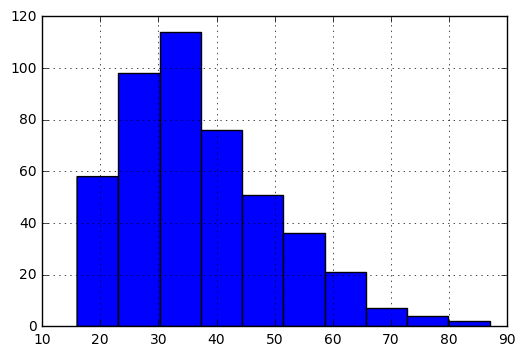

In [36]:
# 10. Display a histogram of ages of all killings
killings.age.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001484D0F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014E71DA0>]], dtype=object)

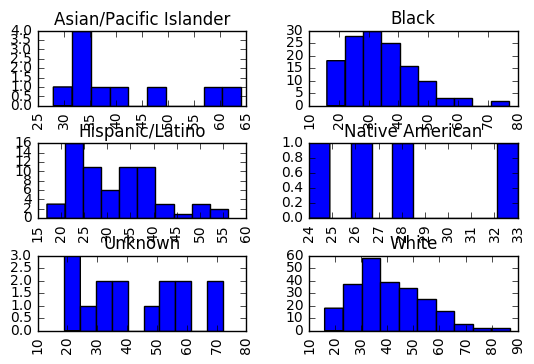

In [37]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race)

In [38]:
# 12. What is the average age of death by race?
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

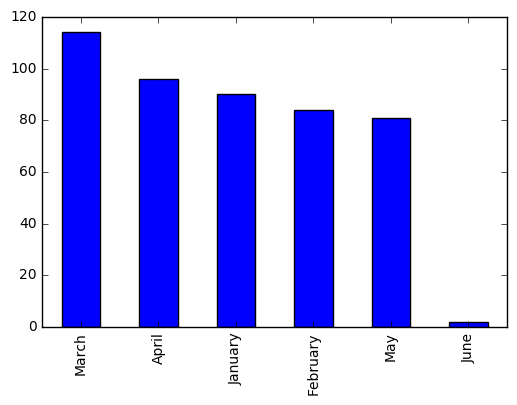

In [39]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar')

In [40]:
###################
### Less Morbid ###
###################

In [41]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

Unnamed: 0  Major_code                                  Major  \
0           0        1100                    GENERAL AGRICULTURE   
1           1        1101  AGRICULTURE PRODUCTION AND MANAGEMENT   
2           2        1102                 AGRICULTURAL ECONOMICS   
3           3        1103                        ANIMAL SCIENCES   
4           4        1104                           FOOD SCIENCE   

                    Major_category   Total  Employed  \
0  Agriculture & Natural Resources  128148     90245   
1  Agriculture & Natural Resources   95326     76865   
2  Agriculture & Natural Resources   33955     26321   
3  Agriculture & Natural Resources  103549     81177   
4  Agriculture & Natural Resources   24280     17281   

   Employed_full_time_year_round  Unemployed  Unemployment_rate  Median  \
0                          74078        2423           0.026147   50000   
1                          64240        2266           0.028636   54000   
2                          22810         821           0.030248   63000   
3                          64937        3619           0.042679   46000   
4                          12722         894           0.049188   62000   

   P25th    P75th  
0  34000  80000.0  
1  36000  80000.0  
2  40000  98000.0  
3  30000  72000.0  
4  38500  90000.0

In [42]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
del majors['Employed_full_time_year_round']
del majors['Major_code']

majors.head()

Unnamed: 0                                  Major  \
0           0                    GENERAL AGRICULTURE   
1           1  AGRICULTURE PRODUCTION AND MANAGEMENT   
2           2                 AGRICULTURAL ECONOMICS   
3           3                        ANIMAL SCIENCES   
4           4                           FOOD SCIENCE   

                    Major_category   Total  Employed  Unemployed  \
0  Agriculture & Natural Resources  128148     90245        2423   
1  Agriculture & Natural Resources   95326     76865        2266   
2  Agriculture & Natural Resources   33955     26321         821   
3  Agriculture & Natural Resources  103549     81177        3619   
4  Agriculture & Natural Resources   24280     17281         894   

   Unemployment_rate  Median  P25th    P75th  
0           0.026147   50000  34000  80000.0  
1           0.028636   54000  36000  80000.0  
2           0.030248   63000  40000  98000.0  
3           0.042679   46000  30000  72000.0  
4           0.049188   62000  38500  90000.0

In [43]:
# 2. Show the cout of missing values in each column

In [44]:
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [88]:
# 3. What are the top 10 highest paying majors?
majors[['Major', 'Median']].sort_values(by='Median',ascending=False).head(10)

Major  Median
59                               PETROLEUM ENGINEERING  125000
154  PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...  106000
57           NAVAL ARCHITECTURE AND MARINE ENGINEERING   97000
55                           METALLURGICAL ENGINEERING   96000
58                                 NUCLEAR ENGINEERING   95000
56                      MINING AND MINERAL ENGINEERING   92000
97                    MATHEMATICS AND COMPUTER SCIENCE   92000
48                              ELECTRICAL ENGINEERING   88000
45                                CHEMICAL ENGINEERING   86000
51              GEOLOGICAL AND GEOPHYSICAL ENGINEERING   85000

In [46]:

majors[majors.Median >= 85000].sort_values(by='Median', ascending=False)

Unnamed: 0                                              Major  \
59           59                              PETROLEUM ENGINEERING   
154         154  PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...   
57           57          NAVAL ARCHITECTURE AND MARINE ENGINEERING   
55           55                          METALLURGICAL ENGINEERING   
58           58                                NUCLEAR ENGINEERING   
56           56                     MINING AND MINERAL ENGINEERING   
97           97                   MATHEMATICS AND COMPUTER SCIENCE   
48           48                             ELECTRICAL ENGINEERING   
45           45                               CHEMICAL ENGINEERING   
51           51             GEOLOGICAL AND GEOPHYSICAL ENGINEERING   

              Major_category   Total  Employed  Unemployed  Unemployment_rate  \
59               Engineering   19631     14002         617           0.042205   
154                   Health  180084    124058        4414           0.034358   
57               Engineering   16094     10690         449           0.040309   
55               Engineering   12818      6939         326           0.044873   
58               Engineering    9826      7320         527           0.067159   
56               Engineering   10746      7416         366           0.047032   
97   Computers & Mathematics    7184      5874         150           0.024900   
48               Engineering  671647    489965       26064           0.050509   
45               Engineering  188046    131697        6388           0.046261   
51               Engineering    6264      4120           0           0.000000   

     Median  P25th     P75th  
59   125000  75000  210000.0  
154  106000  78000  125000.0  
57    97000  60000  125000.0  
55    96000  65000  123000.0  
58    95000  65000  128000.0  
56    92000  52000  124000.0  
97    92000  53000  136000.0  
48    88000  60000  116000.0  
45    86000  60000  120000.0  
51    85000  55000  125000.0

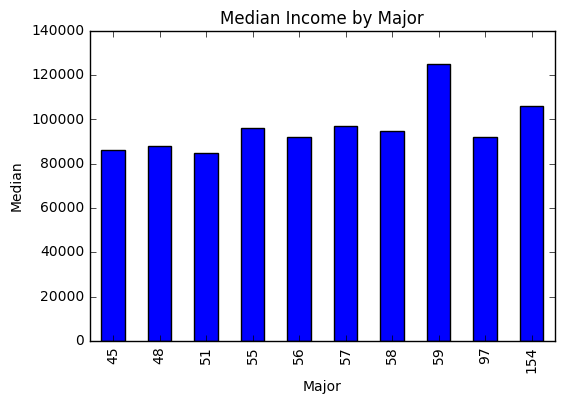

In [95]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors[majors.Median >= 85000].Median.plot(kind='bar',legend=None, title = 'Median Income by Major',x=majors.Major)
plt.xlabel('Major')
plt.ylabel('Median')
#major_pay

In [147]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [149]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.mean().sort_values(ascending=False).head(5)

Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

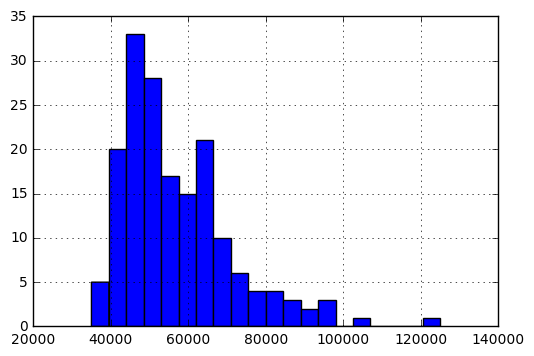

In [151]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist(bins=20)

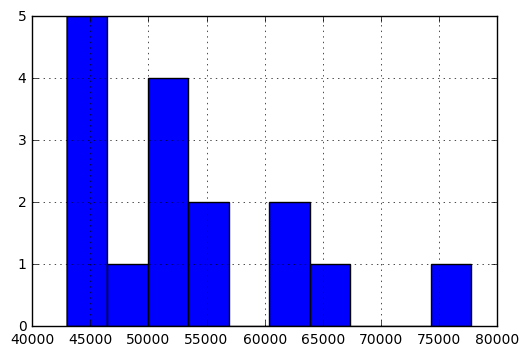

In [152]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.groupby('Major_category').Median.mean().hist()

In [164]:
# 9. What are the top 10 most UNemployed majors?
# What are the unemployment rates?
majors.groupby('Unemployment_rate').Major.value_counts().tail(10)

Unemployment_rate  Major                                   
0.085991           ARCHITECTURE                                1
0.086022           ASTRONOMY AND ASTROPHYSICS                  1
0.087336           SOCIAL PSYCHOLOGY                           1
0.090264           COMPUTER PROGRAMMING AND DATA PROCESSING    1
0.094658           VISUAL AND PERFORMING ARTS                  1
0.094843           LIBRARY SCIENCE                             1
0.101746           SCHOOL STUDENT COUNSELING                   1
0.101796           MILITARY TECHNOLOGIES                       1
0.102712           CLINICAL PSYCHOLOGY                         1
0.156147           MISCELLANEOUS FINE ARTS                     1
Name: Major, dtype: int64

In [180]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors.groupby('Major_category').Unemployment_rate.mean()

Major_category
Agriculture & Natural Resources        0.039569
Arts                                   0.087601
Biology & Life Science                 0.049936
Business                               0.054496
Communications & Journalism            0.069125
Computers & Mathematics                0.059437
Education                              0.046762
Engineering                            0.050630
Health                                 0.047209
Humanities & Liberal Arts              0.069429
Industrial Arts & Consumer Services    0.058546
Interdisciplinary                      0.077269
Law & Public Policy                    0.067854
Physical Sciences                      0.054541
Psychology & Social Work               0.077867
Social Science                         0.065686
Name: Unemployment_rate, dtype: float64

In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [184]:
majors['sample_employment_rate'] = majors['Employed']/majors['Total']
majors

Unnamed: 0                                              Major  \
0             0                                GENERAL AGRICULTURE   
1             1              AGRICULTURE PRODUCTION AND MANAGEMENT   
2             2                             AGRICULTURAL ECONOMICS   
3             3                                    ANIMAL SCIENCES   
4             4                                       FOOD SCIENCE   
5             5                         PLANT SCIENCE AND AGRONOMY   
6             6                                       SOIL SCIENCE   
7             7                          MISCELLANEOUS AGRICULTURE   
8             8                              ENVIRONMENTAL SCIENCE   
9             9                                           FORESTRY   
10           10                       NATURAL RESOURCES MANAGEMENT   
11           11                                       ARCHITECTURE   
12           12               AREA ETHNIC AND CIVILIZATION STUDIES   
13           13                                     COMMUNICATIONS   
14           14                                         JOURNALISM   
15           15                                         MASS MEDIA   
16           16                   ADVERTISING AND PUBLIC RELATIONS   
17           17                         COMMUNICATION TECHNOLOGIES   
18           18                   COMPUTER AND INFORMATION SYSTEMS   
19           19           COMPUTER PROGRAMMING AND DATA PROCESSING   
20           20                                   COMPUTER SCIENCE   
21           21                               INFORMATION SCIENCES   
22           22    COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY   
23           23         COMPUTER NETWORKING AND TELECOMMUNICATIONS   
24           24             COSMETOLOGY SERVICES AND CULINARY ARTS   
25           25                                  GENERAL EDUCATION   
26           26         EDUCATIONAL ADMINISTRATION AND SUPERVISION   
27           27                          SCHOOL STUDENT COUNSELING   
28           28                               ELEMENTARY EDUCATION   
29           29                      MATHEMATICS TEACHER EDUCATION   
..          ...                                                ...   
143         143                   FILM VIDEO AND PHOTOGRAPHIC ARTS   
144         144                          ART HISTORY AND CRITICISM   
145         145                                        STUDIO ARTS   
146         146                            MISCELLANEOUS FINE ARTS   
147         147                GENERAL MEDICAL AND HEALTH SERVICES   
148         148      COMMUNICATION DISORDERS SCIENCES AND SERVICES   
149         149         HEALTH AND MEDICAL ADMINISTRATIVE SERVICES   
150         150                         MEDICAL ASSISTING SERVICES   
151         151                   MEDICAL TECHNOLOGIES TECHNICIANS   
152         152            HEALTH AND MEDICAL PREPARATORY PROGRAMS   
153         153                                            NURSING   
154         154  PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...   
155         155                      TREATMENT THERAPY PROFESSIONS   
156         156                        COMMUNITY AND PUBLIC HEALTH   
157         157           MISCELLANEOUS HEALTH MEDICAL PROFESSIONS   
158         158                                   GENERAL BUSINESS   
159         159                                         ACCOUNTING   
160         160                                  ACTUARIAL SCIENCE   
161         161             BUSINESS MANAGEMENT AND ADMINISTRATION   
162         162                OPERATIONS LOGISTICS AND E-COMMERCE   
163         163                                 BUSINESS ECONOMICS   
164         164                   MARKETING AND MARKETING RESEARCH   
165         165                                            FINANCE   
166         166           HUMAN RESOURCES AND PERSONNEL MANAGEMENT   
167         167                             INTERNATIONAL BUSINESS   
168         168

In [ ]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

In [186]:
majors['sample_unemployment_rate']= 1 - majors['sample_employment_rate']
majors

Unnamed: 0                                              Major  \
0             0                                GENERAL AGRICULTURE   
1             1              AGRICULTURE PRODUCTION AND MANAGEMENT   
2             2                             AGRICULTURAL ECONOMICS   
3             3                                    ANIMAL SCIENCES   
4             4                                       FOOD SCIENCE   
5             5                         PLANT SCIENCE AND AGRONOMY   
6             6                                       SOIL SCIENCE   
7             7                          MISCELLANEOUS AGRICULTURE   
8             8                              ENVIRONMENTAL SCIENCE   
9             9                                           FORESTRY   
10           10                       NATURAL RESOURCES MANAGEMENT   
11           11                                       ARCHITECTURE   
12           12               AREA ETHNIC AND CIVILIZATION STUDIES   
13           13                                     COMMUNICATIONS   
14           14                                         JOURNALISM   
15           15                                         MASS MEDIA   
16           16                   ADVERTISING AND PUBLIC RELATIONS   
17           17                         COMMUNICATION TECHNOLOGIES   
18           18                   COMPUTER AND INFORMATION SYSTEMS   
19           19           COMPUTER PROGRAMMING AND DATA PROCESSING   
20           20                                   COMPUTER SCIENCE   
21           21                               INFORMATION SCIENCES   
22           22    COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY   
23           23         COMPUTER NETWORKING AND TELECOMMUNICATIONS   
24           24             COSMETOLOGY SERVICES AND CULINARY ARTS   
25           25                                  GENERAL EDUCATION   
26           26         EDUCATIONAL ADMINISTRATION AND SUPERVISION   
27           27                          SCHOOL STUDENT COUNSELING   
28           28                               ELEMENTARY EDUCATION   
29           29                      MATHEMATICS TEACHER EDUCATION   
..          ...                                                ...   
143         143                   FILM VIDEO AND PHOTOGRAPHIC ARTS   
144         144                          ART HISTORY AND CRITICISM   
145         145                                        STUDIO ARTS   
146         146                            MISCELLANEOUS FINE ARTS   
147         147                GENERAL MEDICAL AND HEALTH SERVICES   
148         148      COMMUNICATION DISORDERS SCIENCES AND SERVICES   
149         149         HEALTH AND MEDICAL ADMINISTRATIVE SERVICES   
150         150                         MEDICAL ASSISTING SERVICES   
151         151                   MEDICAL TECHNOLOGIES TECHNICIANS   
152         152            HEALTH AND MEDICAL PREPARATORY PROGRAMS   
153         153                                            NURSING   
154         154  PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...   
155         155                      TREATMENT THERAPY PROFESSIONS   
156         156                        COMMUNITY AND PUBLIC HEALTH   
157         157           MISCELLANEOUS HEALTH MEDICAL PROFESSIONS   
158         158                                   GENERAL BUSINESS   
159         159                                         ACCOUNTING   
160         160                                  ACTUARIAL SCIENCE   
161         161             BUSINESS MANAGEMENT AND ADMINISTRATION   
162         162                OPERATIONS LOGISTICS AND E-COMMERCE   
163         163                                 BUSINESS ECONOMICS   
164         164                   MARKETING AND MARKETING RESEARCH   
165         165                                            FINANCE   
166         166           HUMAN RESOURCES AND PERSONNEL MANAGEMENT   
167         167                             INTERNATIONAL BUSINESS   
168         168